## COM 404E – Project on Breast Cancer using  K-NN,Support Vecor Machine,Decision Tree , Random Forest

#### I will   VotingClassifier to ensemble the 4 models to make one accurate predictive system

In [7]:
# Create a label encoder
le = LabelEncoder()
# Fit and transform the 'diagnosis' column
df['diagnosis'] = le.fit_transform(df['diagnosis'])print("SAMUEL KIANDO WAINAINA")
print("P101/1372G/20")
print("COM 404E PROJECT BASED ON BREAST CANCER WITH IT HAVING A PREDICTIVE SYSTEM")

SAMUEL KIANDO WAINAINA
P101/1372G/20
COM 404E PROJECT BASED ON BREAST CANCER WITH IT HAVING A PREDICTIVE SYSTEM


## DATASET LINK
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [41]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier


print('All the Libraries Have been installed')

All the Libraries Have been installed


## loading the dataset using Pandas Data Frame

In [8]:
#  Load the data
df = pd.read_csv('breast-cancer.csv')

### Data Preprocessing

In [3]:
#Check the info of the dataset to know the categorical and categorical Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* The diagnosis its the only categorical column i have
* All other columns are numerical (int and float)
* With this i can use Diagnosis as my target Feature

In [10]:
#Cheking the first 5 rows using the head() function
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Checking the Tail of the last five columns usng the tail() Function
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [12]:
#Check the null Values of the dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
#Checking the clumsn in my   breaset dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
#Check the Duplicates in the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

* interesting the have a dataset set that is having less of cleaning

## Exploratory Data Analysis

In [18]:
#Check the Statiscal Distribution of the dataset using the keyword Describe
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
#  Display the diagnosis label distribution
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

* malignant (cancerous)
* benign (non-cancerous)

<Axes: xlabel='diagnosis', ylabel='count'>

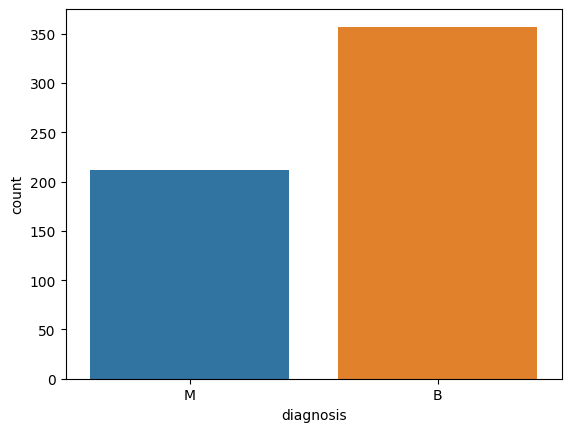

In [32]:
# f) Use seaborn to display count plot for the diagnosis
sns.countplot(x='diagnosis', data=df)


* with the data Trend this Shows that
* 1) about 230 of the women are malignant (cancerous)
* 2) about 350 of the women are benign (non-cancerous).

<Axes: xlabel='radius_mean', ylabel='radius_mean'>

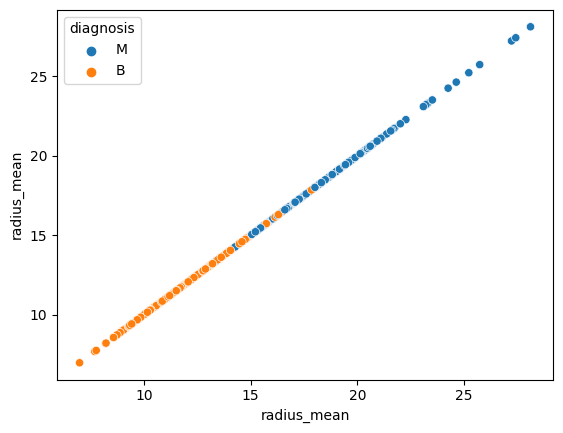

In [28]:
# Scatter plot using seaborn
sns.scatterplot(x='radius_mean', y='radius_mean', hue='diagnosis', data=df)

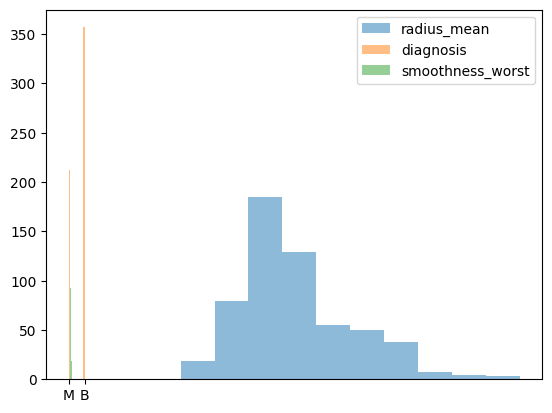

In [34]:
# Plot a histogram for multiple columns
plt.hist(df['radius_mean'], bins=10, alpha=0.5, label='radius_mean')
plt.hist(df['diagnosis'], bins=10, alpha=0.5, label='diagnosis')
plt.hist(df['smoothness_worst'], bins=10, alpha=0.5, label='smoothness_worst')
plt.legend(loc='upper right')
plt.show()

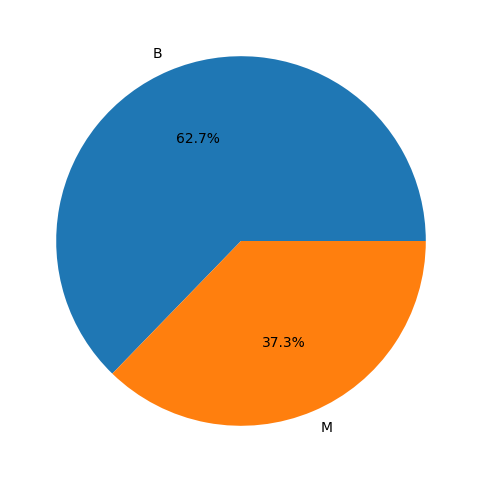

In [36]:
# Create a pie chart with percentages
plt.figure(figsize=(6,6))
plt.pie(df['diagnosis'].value_counts(), labels = df['diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.show()


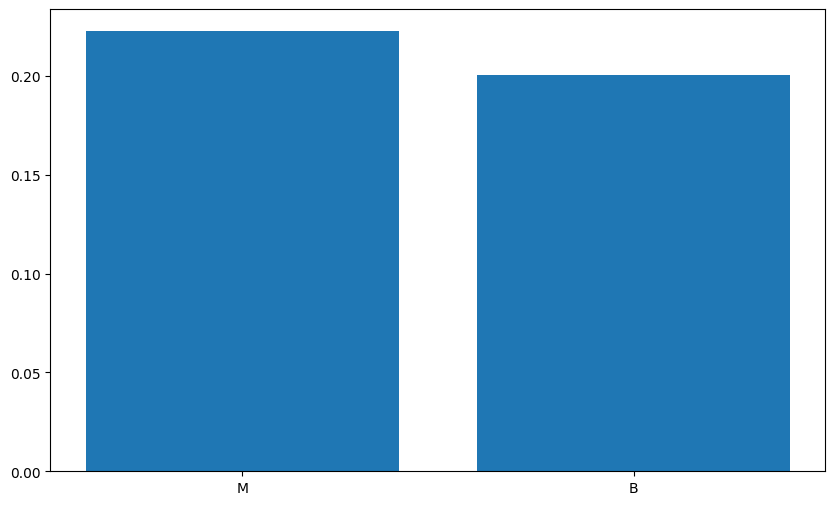

In [38]:
# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(df['diagnosis'], df['smoothness_worst'])
plt.show()

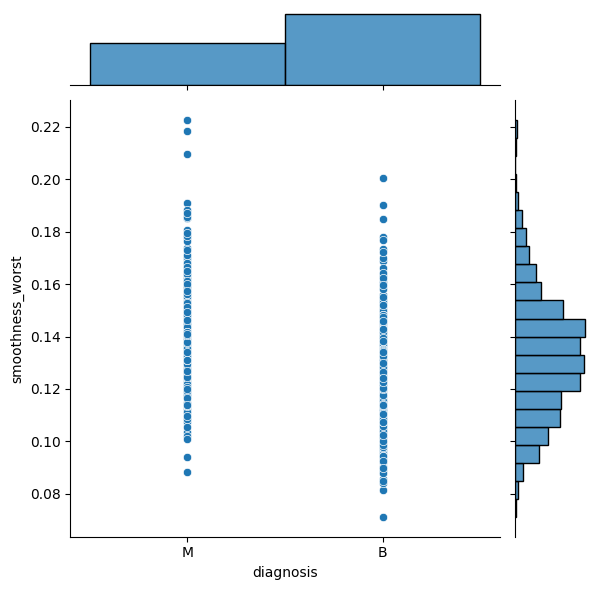

In [39]:
# g) Use seaborn to display
sns.jointplot(x='diagnosis', y='smoothness_worst', data=df)

## Data Encoding and splitting the Data

In [42]:
# Create a label encoder
le = LabelEncoder()
# Fit and transform the 'diagnosis' column
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [43]:

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

* 0-shows malignant (cancerous)
* 1-Shows benign (non-cancerous)

In [44]:
#Check the Mean of the Target column
df['diagnosis'].mean()

0.37258347978910367

In [45]:
#  Split the data such that 25% is reserved testing
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [46]:
# Show the shape of training set and the test set
print(X_train.shape)
print(X_test.shape)

(426, 31)
(143, 31)


### Model Training

### KNN Classifier

In [47]:
#  Train a model using K-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [48]:
# confusion matrix
print(confusion_matrix(y_test, knn_pred))

[[79 10]
 [28 26]]


<Axes: >

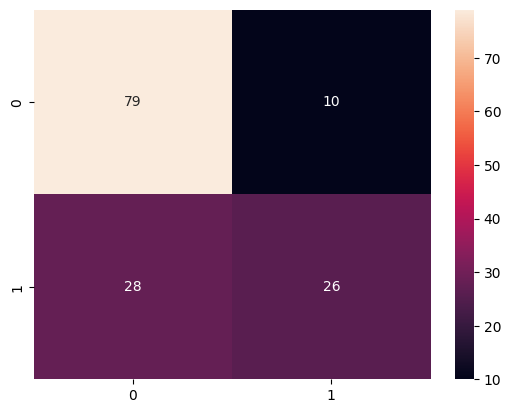

In [49]:
# the heat map
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

In [50]:
#  the classification accuracy of KNN
print(accuracy_score(y_test, knn_pred))


0.7342657342657343


In [51]:
#Compare the training and testing accuracy
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8450704225352113
0.7342657342657343


### Support Vector Machine

In [52]:
# Train a model using SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [54]:
# the confusion matrix
print(confusion_matrix(y_test, svm_pred))

[[89  0]
 [54  0]]


<Axes: >

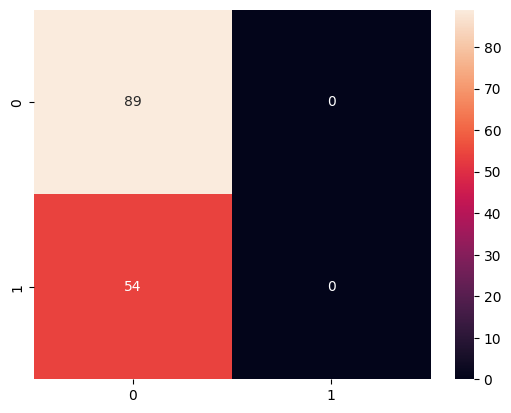

In [55]:
#  heat map
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True)


In [56]:
# the classification accuracy
print(accuracy_score(y_test, svm_pred))

0.6223776223776224


In [57]:
# Compare the training and testing accuracy
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.6291079812206573
0.6223776223776224


### Decision Tree

In [106]:

# Train a model using Decision Tree with max_depth set to prevent overfitting using prunning
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
# Make predictions
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [107]:
# Show the confusion matrix
print(confusion_matrix(y_test, dt_pred_test))

[[83  6]
 [ 6 48]]


<Axes: >

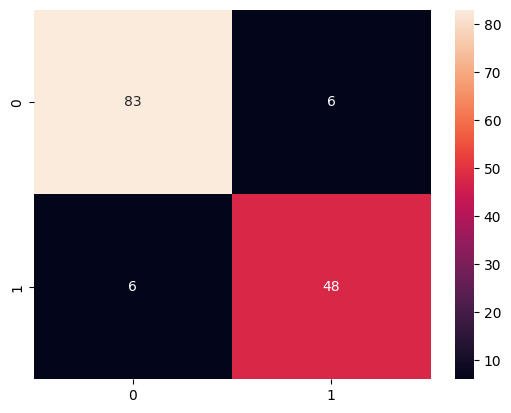

In [108]:
# Show the heat map
sns.heatmap(confusion_matrix(y_test, dt_pred_test), annot=True)

In [109]:
# Show the classification accuracy
print(accuracy_score(y_test, dt_pred_test))

0.916083916083916


In [110]:
# # Check accuracy
print("Training accuracy: ", accuracy_score(y_train, dt_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, dt_pred_test))

Training accuracy:  0.9460093896713615
Testing accuracy:  0.916083916083916


## Random Forest

In [132]:
# Train a model using Random Forest
rf = RandomForestClassifier(n_estimators=88, max_depth=1, min_samples_leaf=1)
rf.fit(X_train, y_train)
# Make predictions
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [133]:
# Show the confusion matrix
print(confusion_matrix(y_test, rf_pred_test))

[[89  0]
 [ 7 47]]


<Axes: >

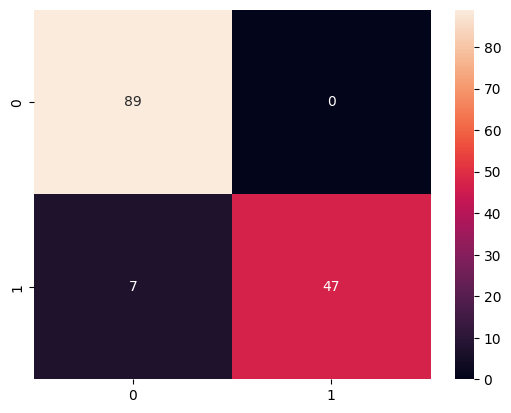

In [134]:
# Show the heat map
sns.heatmap(confusion_matrix(y_test, rf_pred_test), annot=True)

In [135]:
# Show the classification accuracy
print(accuracy_score(y_test, rf_pred_test))

0.951048951048951


In [136]:
# Compare the training and testing accuracy
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9413145539906104
0.951048951048951


In [68]:
# Compare the performance of the models
models = ['K-NN', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [knn.score(X_test, y_test), svm.score(X_test, y_test), dt.score(X_test, y_test), rf.score(X_test, y_test)]



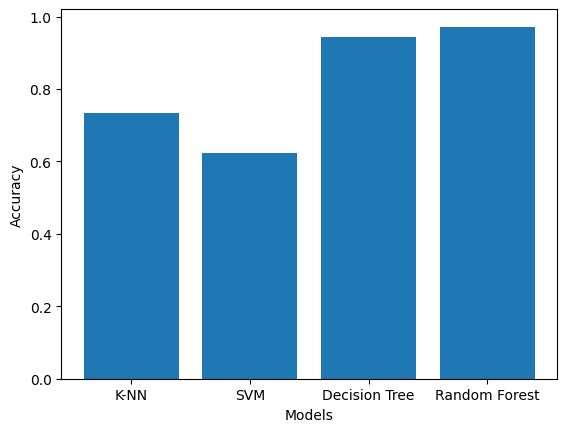

In [69]:
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [70]:
from sklearn.ensemble import VotingClassifier
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('dt', dt), ('rf', rf)],
    voting='hard')
# Fit the classifier to the training data
voting_clf.fit(X_train, y_train)
# Use the voting classifier to make predictions
voting_pred = voting_clf.predict(X_test)
# Show the classification accuracy
print(accuracy_score(y_test, voting_pred))
# Compare the training and testing accuracy
print(voting_clf.score(X_train, y_train))
print(voting_clf.score(X_test, y_test))

0.7832167832167832
0.8615023474178404
0.7832167832167832


In [74]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:

# use  a scaler for preprocessing, and a LabelEncoder le for decoding the labels
def predict_diagnosis(details):
    # Convert the details to a DataFrame
    df = pd.DataFrame(data=[details], columns=['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
    # Preprocess the details in the same way as the training data
    df = scaler.transform(df)
    # Use the trained model to make a prediction
    prediction = voting_clf.predict(df)
    # Convert the prediction to a more readable form
    prediction = le.inverse_transform(prediction)
    # Display a message
    if prediction[0] == 'M':
        print('The diagnosis is malignant (cancerous).')
    else:
        print('The diagnosis is benign (non-cancerous).')

    return prediction[0]
# Example usage:
details = [842302, 17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
print(predict_diagnosis(details))

The diagnosis is benign (non-cancerous).
B


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
